In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
versions = ['pure_python', 'numba_accelarated_python', 'pure_julia']
chunks = []
for version in versions:
    try:
        df = pd.read_csv(f'./{version}.csv')
        df['version'] = version
        chunks.append(df)
    except Exception as e:
        print(e)
data = pd.concat(chunks, sort=False)
data.head()

,n_nodes,elapsed,version
0,1,0.000092,pure_python
1,1,0.000060,pure_python
2,1,0.000004,pure_python
3,1,0.000002,pure_python
4,1,0.000053,pure_python


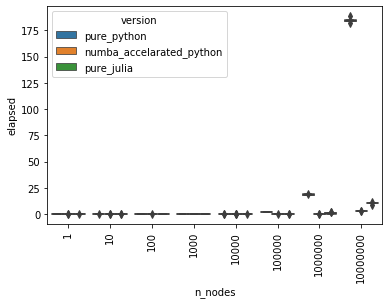

In [3]:
ax = sns.boxplot(data=data, y='elapsed', x='n_nodes', hue='version')
# ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


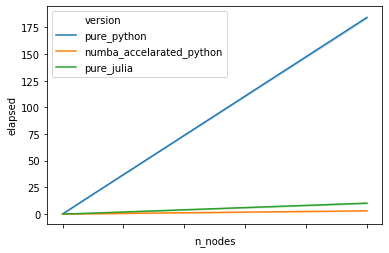

In [4]:
ax = sns.lineplot(data=data, y='elapsed', x='n_nodes', hue='version')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


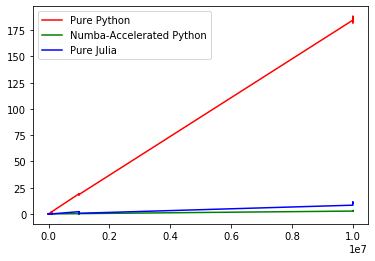

In [5]:
plt.plot("n_nodes", "elapsed", data=data.loc[data['version'] == 'pure_python'], color='r')
plt.plot("n_nodes", "elapsed", data=data.loc[data['version'] == 'numba_accelarated_python'], color='g')
plt.plot("n_nodes", "elapsed", data=data.loc[data['version'] == 'pure_julia'], color='b')
plt.legend(['Pure Python', 'Numba-Accelerated Python', 'Pure Julia'])
plt.show()

In [25]:
metric_names = ['mean', 'median', 'std']
data_aggregated = data.groupby(['version', 'n_nodes']).agg(['median', 'mean', 'std'])
# data_aggregated = pd.pivot_table(data_aggregated, values=metric_names,
#                                 index=['n_nodes'], columns=['version'], aggfunc='mean')
data_aggregated = data_aggregated['elapsed'].reset_index()
data_aggregated.sort_values(['version', 'n_nodes'], inplace=True)
data_aggregated.head()

,version,n_nodes,median,mean,std
0,numba_accelarated_python,1,0.000116,0.000126,0.000028
1,numba_accelarated_python,10,0.000156,0.000182,0.000094
2,numba_accelarated_python,100,0.000170,0.000188,0.000045
3,numba_accelarated_python,1000,0.000634,0.000624,0.000109
4,numba_accelarated_python,10000,0.004079,0.003872,0.000532


In [7]:
data_aggregated.dtypes

version     object
n_nodes      int64
median     float64
mean       float64
std        float64
dtype: object

Text(0.5, 1.0, 'Log-Scaled Barplot')

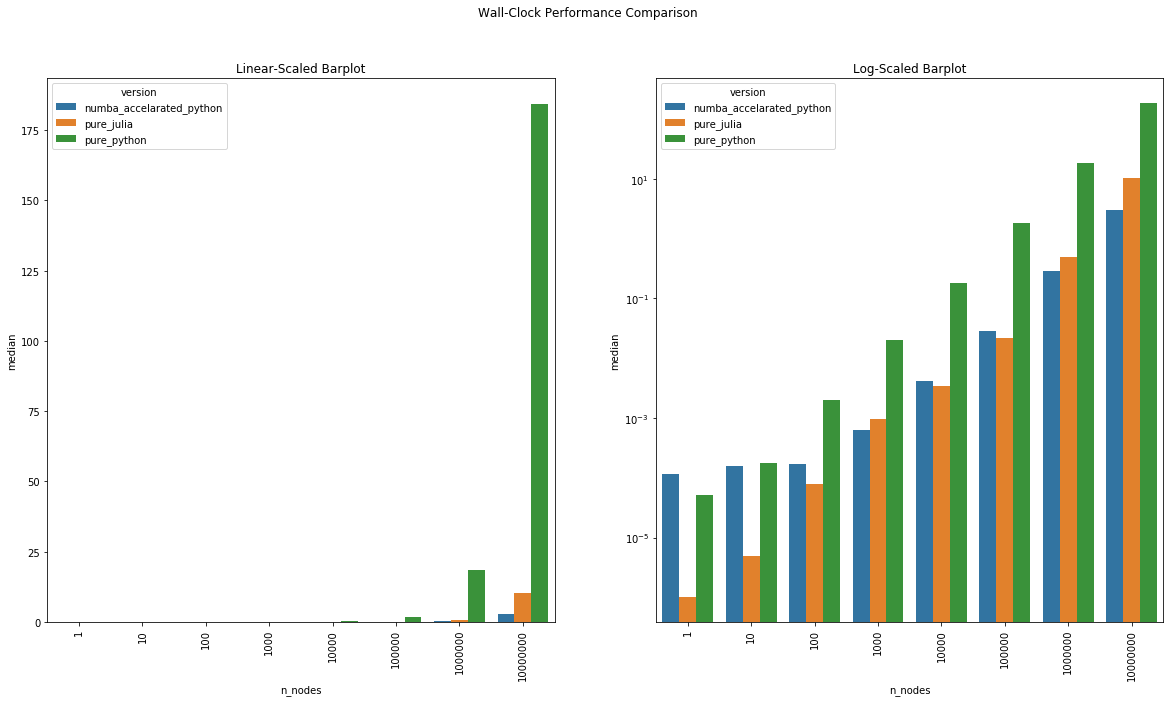

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Wall-Clock Performance Comparison')

sns.barplot(data=data_aggregated, y='median', x='n_nodes', hue='version', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);
ax1.set_title('Linear-Scaled Barplot')

sns.barplot(data=data_aggregated, y='median', x='n_nodes', hue='version', ax=ax2)
ax2.set_yscale('log')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90);
ax2.set_title('Log-Scaled Barplot')


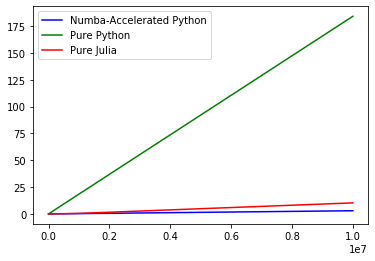

In [37]:
plt.figure()
plt.plot(x_values,
         data_aggregated[data_aggregated['version'] == 'numba_accelarated_python']['median'].values, color='b')
plt.plot(x_values,
         data_aggregated[data_aggregated['version'] == 'pure_python']['median'].values, color='g')
plt.plot(x_values, 
         data_aggregated[data_aggregated['version'] == 'pure_julia']['median'].values, 
         color='r')
plt.legend(['Numba-Accelerated Python', 'Pure Python', 'Pure Julia'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# ax2.set_title('Linear-Scaled Lineplot')

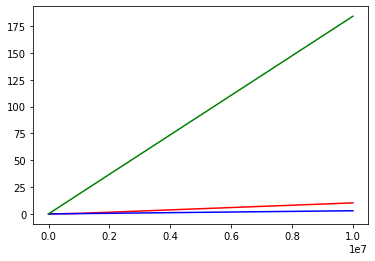

In [42]:
x_values = data_aggregated[data_aggregated['version'] == 'pure_julia']['n_nodes'].values
y_values = data_aggregated[data_aggregated['version'] == 'pure_julia']['median'].values
plt.plot(x_values, y_values, color='r')

x_values = data_aggregated[data_aggregated['version'] == 'numba_accelarated_python']['n_nodes'].values
y_values = data_aggregated[data_aggregated['version'] == 'numba_accelarated_python']['median'].values
plt.plot(x_values, y_values, color='b')

x_values = data_aggregated[data_aggregated['version'] == 'pure_python']['n_nodes'].values
y_values = data_aggregated[data_aggregated['version'] == 'pure_python']['median'].values
plt.plot(x_values, y_values, color='g')

In [15]:
data_aggregated[data_aggregated['version'] == 'pure_julia']['median'].values

array([1.01100000e-06, 4.95900000e-06, 8.02500000e-05, 9.74388000e-04,
       3.36307200e-03, 2.13395335e-02, 4.97132277e-01, 1.02924281e+01])

In [28]:
data_aggregated[data_aggregated['version'] == 'pure_python']['median'].values

array([5.16176224e-05, 1.74283981e-04, 2.03180313e-03, 1.97904110e-02,
       1.77343965e-01, 1.84892476e+00, 1.84820093e+01, 1.84233577e+02])

In [29]:
data_aggregated[data_aggregated['version'] == 'numba_accelarated_python']['median'].values

array([1.16348267e-04, 1.56044960e-04, 1.69634819e-04, 6.34431839e-04,
       4.07922268e-03, 2.80709267e-02, 2.83056855e-01, 2.95736289e+00])

### Improvement Ratio agains Pure-Python

In [34]:
data_aggregated_pivot = pd.pivot_table(data_aggregated, values=['median', 'mean'],
                                index=['n_nodes'], columns=['version'], aggfunc='mean') 
data_aggregated_pivot

mean                         \
version  numba_accelarated_python pure_julia pure_python   
n_nodes                                                    
1                        0.000126   0.000001    0.000045   
10                       0.000182   0.000007    0.000182   
100                      0.000188   0.000083    0.002071   
1000                     0.000624   0.000984    0.020030   
10000                    0.003872   0.004212    0.184812   
100000                   0.027754   0.021893    1.865421   
1000000                  0.278205   0.854804   18.542960   
10000000                 2.962619  10.188692  184.358930   

                           median                         
version  numba_accelarated_python pure_julia pure_python  
n_nodes                                                   
1                        0.000116   0.000001    0.000052  
10                       0.000156   0.000005    0.000174  
100                      0.000170   0.000080    0.002032  
1000                     0.000634   0.000974    0.019790  
10000                    0.004079   0.003363    0.177344  
100000                   0.028071   0.021340    1.848925  
1000000                  0.283057   0.497132   18.482009  
10000000                 2.957363  10.292428  184.233577

In [35]:
data_aggregated_mean = data_aggregated_pivot['median']
data_aggregated_mean['ratio_numba_accelarated_python'] = (data_aggregated_mean['pure_python'] /
                                                          data_aggregated_mean['numba_accelarated_python'])

data_aggregated_mean['ratio_pure_julia'] = (data_aggregated_mean['pure_python'] /
                                         data_aggregated_mean['pure_julia'])
data_aggregated_mean.drop(['numba_accelarated_python', 'pure_python', 'pure_julia'], axis=1, inplace=True)
data_aggregated_mean

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

version,ratio_numba_accelarated_python,ratio_pure_julia
n_nodes,,
1,0.443648,51.056006
10,1.116883,35.144985
100,11.977512,25.318419
1000,31.193912,20.310606
10000,43.474941,52.732729
100000,65.866182,86.643167
1000000,65.294336,37.177247
10000000,62.296574,17.899914


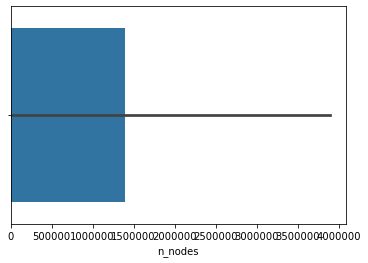

In [11]:
sns.barplot(data=data_aggregated_mean.reset_index(), x='n_nodes')

In [48]:
data_aggregated_mean.to_markdown()

'|   n_nodes |   ratio_numba_accelarated_python |   ratio_pure_julia |\n|----------:|---------------------------------:|-------------------:|\n|         1 |                         0.443648 |            51.056  |\n|        10 |                         1.11688  |            35.145  |\n|       100 |                        11.9775   |            25.3184 |\n|      1000 |                        31.1939   |            20.3106 |\n|     10000 |                        43.4749   |            52.7327 |\n|    100000 |                        65.8662   |            86.6432 |\n|   1000000 |                        65.2943   |            37.1772 |\n|  10000000 |                        62.2966   |            17.8999 |'

In [49]:
data_aggregated_mean['ratio_pure_julia'].mean()

40.7853841322642